In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import f1_score, recall_score, precision_score
from tqdm import tqdm
import pandas as pd
import numpy as np
import missingno as msno

# Read Data

In [25]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Describe the data(statisics)

In [107]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Missing values

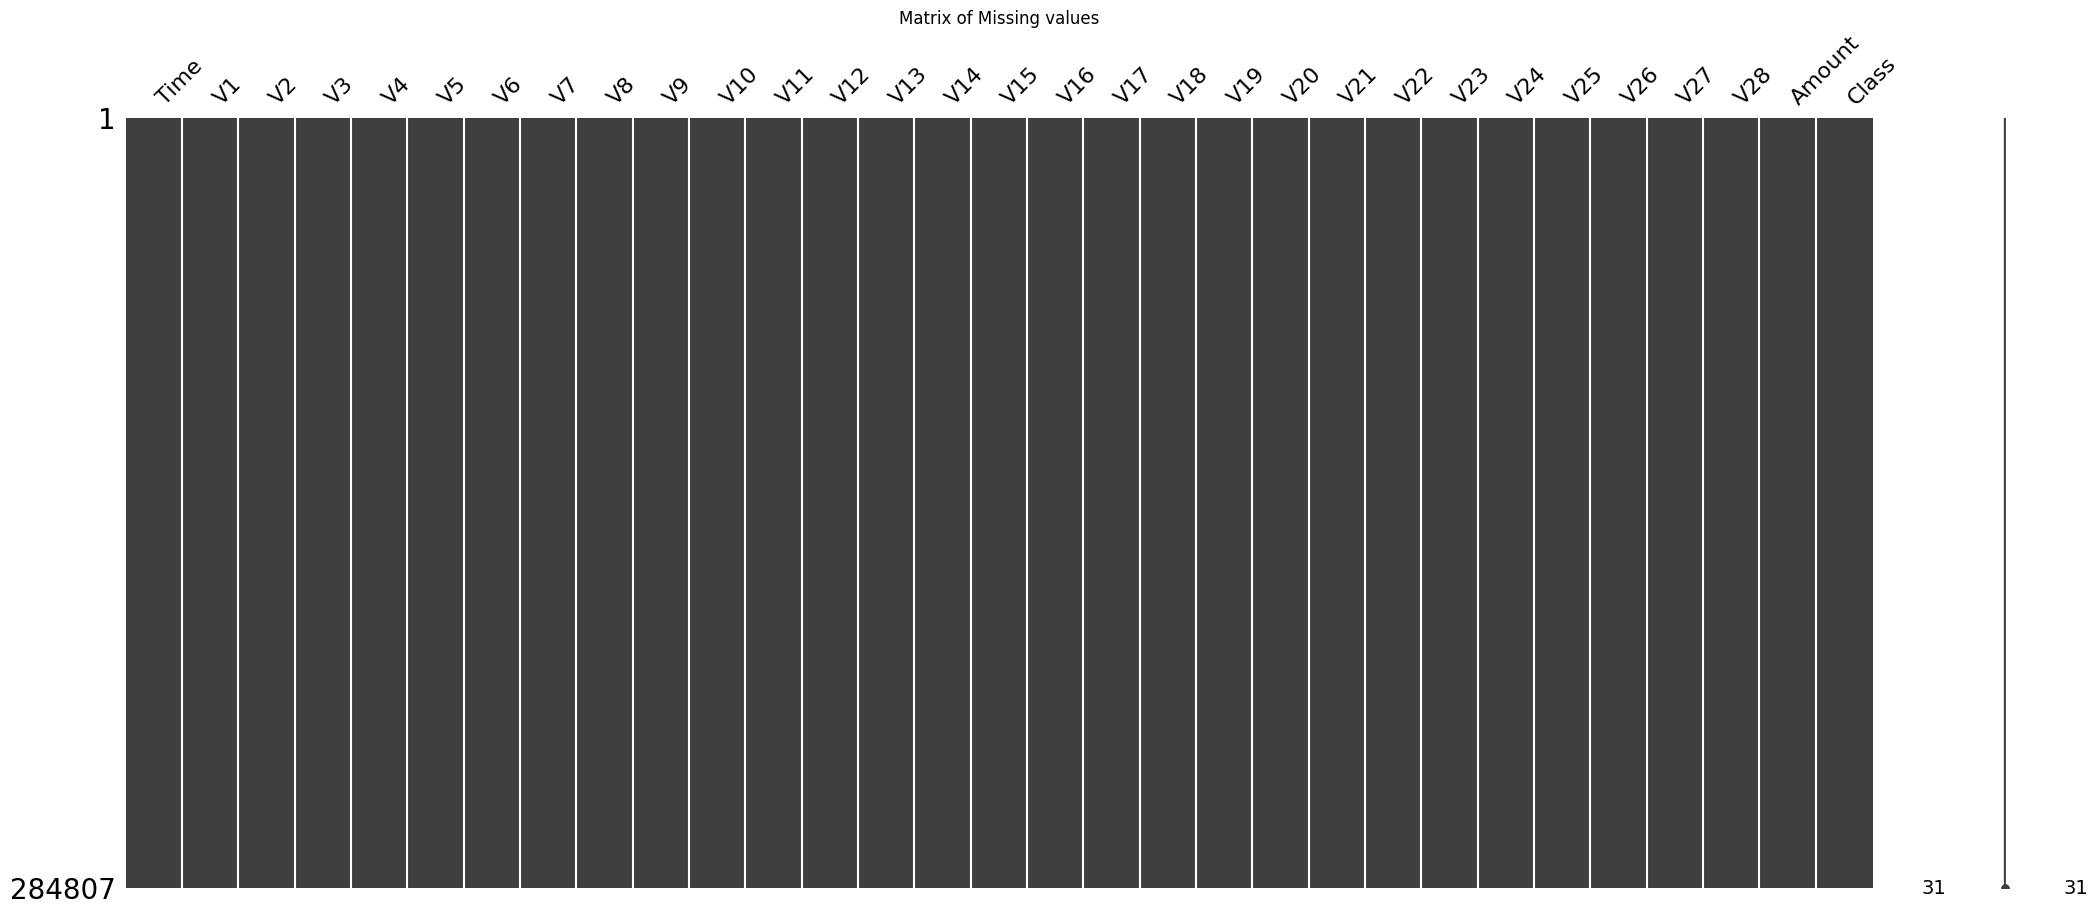

In [114]:
msno.matrix(data)
plt.title('Matrix of Missing values')
plt.show()

# Correlation between features

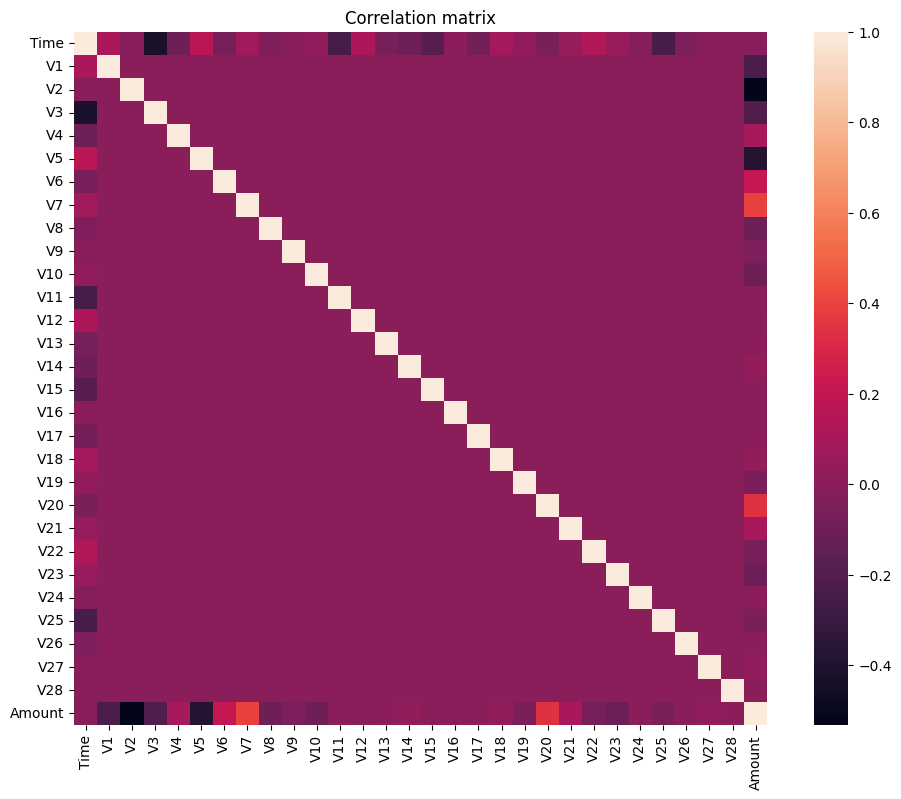

In [115]:
corr = data.drop('Class', axis=1).corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corr, square=True)
plt.title('Correlation matrix')
plt.show()

In [26]:
X = data.drop(['Class'], axis=1)
y = data['Class']

# Test different k-means 

In [94]:
results_df = pd.DataFrame(columns=['random_state','f1', 'recall', 'precision', 'percent', 'fraud_count'])
for i in range(0, 50):
    kmeans = KMeans(n_clusters=2, random_state=i, n_init='auto', init='k-means++')
    kmeans.fit(X)
    labels = kmeans.labels_
    fraud_count = [0,0]
    for j in range(len(labels)):
        if y[j] == 1:
            fraud_count[labels[j]] += 1
    count = [len(labels[labels==0]), len(labels[labels==1])]
    percent = [fraud_count[0]/count[0], fraud_count[1]/count[1]]
    fraud_cluster = np.argmax(percent)
    if fraud_cluster == 0:
        labels[labels==0] = 2
        labels[labels==1] = 0
        labels[labels==2] = 1
    recall = recall_score(y, labels)
    precision = precision_score(y, labels)
    f1 = f1_score(y, labels)
    results_df.loc[i] = [i, round(f1, 3), round(recall, 3), round(precision, 3), round(percent[fraud_cluster],3), fraud_count[fraud_cluster]]

In [101]:
results_df.sort_values(by=['f1'], ascending=False, inplace=True)
results_df.head(20)

,random_state,f1,recall,precision,percent,fraud_count
9,9.0,0.063,0.079,0.052,0.052,39.0
19,19.0,0.063,0.079,0.052,0.052,39.0
37,37.0,0.024,0.193,0.013,0.013,95.0
18,18.0,0.017,0.476,0.009,0.009,234.0
13,13.0,0.015,0.557,0.007,0.007,274.0
11,11.0,0.014,0.528,0.007,0.007,260.0
39,39.0,0.012,0.258,0.006,0.006,127.0
34,34.0,0.012,0.258,0.006,0.006,127.0
48,48.0,0.012,0.258,0.006,0.006,127.0
21,21.0,0.012,0.258,0.006,0.006,127.0


# Best k-means

In [118]:
results_df.iloc[[4,18]]

,random_state,f1,recall,precision,percent,fraud_count
13,13.0,0.015,0.557,0.007,0.007,274.0
28,28.0,0.004,1.000,0.002,0.002,492.0


In [102]:
def details(labels, y):
    fraud_count = [0,0]
    for j in range(len(labels)):
        if y[j] == 1:
            fraud_count[labels[j]] += 1
    count = [len(labels[labels==0]), len(labels[labels==1])]
    percent = [fraud_count[0]/count[0], fraud_count[1]/count[1]]
    fraud_cluster = np.argmax(percent)
    return fraud_count, count, percent, fraud_cluster

In [106]:
kmeans1 = KMeans(n_clusters=2, random_state=13, n_init='auto', init='k-means++')
kmeans1.fit(X)
labels1 = kmeans1.labels_
fraud_count1, count1, percent1, fraud_cluster1 = details(labels1, y)

kmeans2 = KMeans(n_clusters=2, random_state=28, n_init='auto', init='k-means++')
kmeans2.fit(X)
labels2 = kmeans2.labels_
fraud_count2, count2, percent2, fraud_cluster2 = details(labels2, y)

print('Cluster 1: ')
print('Count of fraud in fraud cluster: ',fraud_count1[fraud_cluster1], ' out of ', count1[fraud_cluster1])
print('Percent of fraud in fraud cluster: ', percent1[fraud_cluster1])
print('Count of fraud in non-fraud cluster: ',fraud_count1[1-fraud_cluster1], ' out of ', count1[1-fraud_cluster1])
print('Percent of fraud in non-fraud cluster: ', percent1[1-fraud_cluster1])


print('\nCluster 2: ')
print('Count of fraud in fraud cluster: ',fraud_count2[fraud_cluster2], ' out of ', count2[fraud_cluster2])
print('Percent of fraud in fraud cluster: ', percent2[fraud_cluster2])
print('Count of fraud in non-fraud cluster: ',fraud_count2[1-fraud_cluster2], ' out of ', count2[1-fraud_cluster2])
print('Percent of fraud in non-fraud cluster: ', percent2[1-fraud_cluster2])

Cluster 1: 
Count of fraud in fraud cluster:  274  out of  36870
Percent of fraud in fraud cluster:  0.007431516137781394
Count of fraud in non-fraud cluster:  218  out of  247937
Percent of fraud in non-fraud cluster:  0.0008792556173544086

Cluster 2: 
Count of fraud in fraud cluster:  492  out of  267497
Percent of fraud in fraud cluster:  0.0018392729638089399
Count of fraud in non-fraud cluster:  0  out of  17310
Percent of fraud in non-fraud cluster:  0.0
